In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [55]:
df=pd.read_csv('d:/dataset/startups.csv')
df.head()

,RD_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RD_Spend         50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [57]:
X=df.iloc[:, :-1].values  
y=df.iloc[:, 3].values

In [58]:
print(X)
print()
print(X.ndim)

[[165349.2  136897.8  471784.1 ]
 [162597.7  151377.59 443898.53]
 [153441.51 101145.55 407934.54]
 [144372.41 118671.85 383199.62]
 [142107.34  91391.77 366168.42]
 [131876.9   99814.71 362861.36]
 [134615.46 147198.87 127716.82]
 [130298.13 145530.06 323876.68]
 [120542.52 148718.95 311613.29]
 [123334.88 108679.17 304981.62]
 [101913.08 110594.11 229160.95]
 [100671.96  91790.61 249744.55]
 [ 93863.75 127320.38 249839.44]
 [ 91992.39 135495.07 252664.93]
 [119943.24 156547.42 256512.92]
 [114523.61 122616.84 261776.23]
 [ 78013.11 121597.55 264346.06]
 [ 94657.16 145077.58 282574.31]
 [ 91749.16 114175.79 294919.57]
 [ 86419.7  153514.11      0.  ]
 [ 76253.86 113867.3  298664.47]
 [ 78389.47 153773.43 299737.29]
 [ 73994.56 122782.75 303319.26]
 [ 67532.53 105751.03 304768.73]
 [ 77044.01  99281.34 140574.81]
 [ 64664.71 139553.16 137962.62]
 [ 75328.87 144135.98 134050.07]
 [ 72107.6  127864.55 353183.81]
 [ 66051.52 182645.56 118148.2 ]
 [ 65605.48 153032.06 107138.38]
 [ 61994.4

In [59]:
print(y)
print()
print(y.ndim)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]

1


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


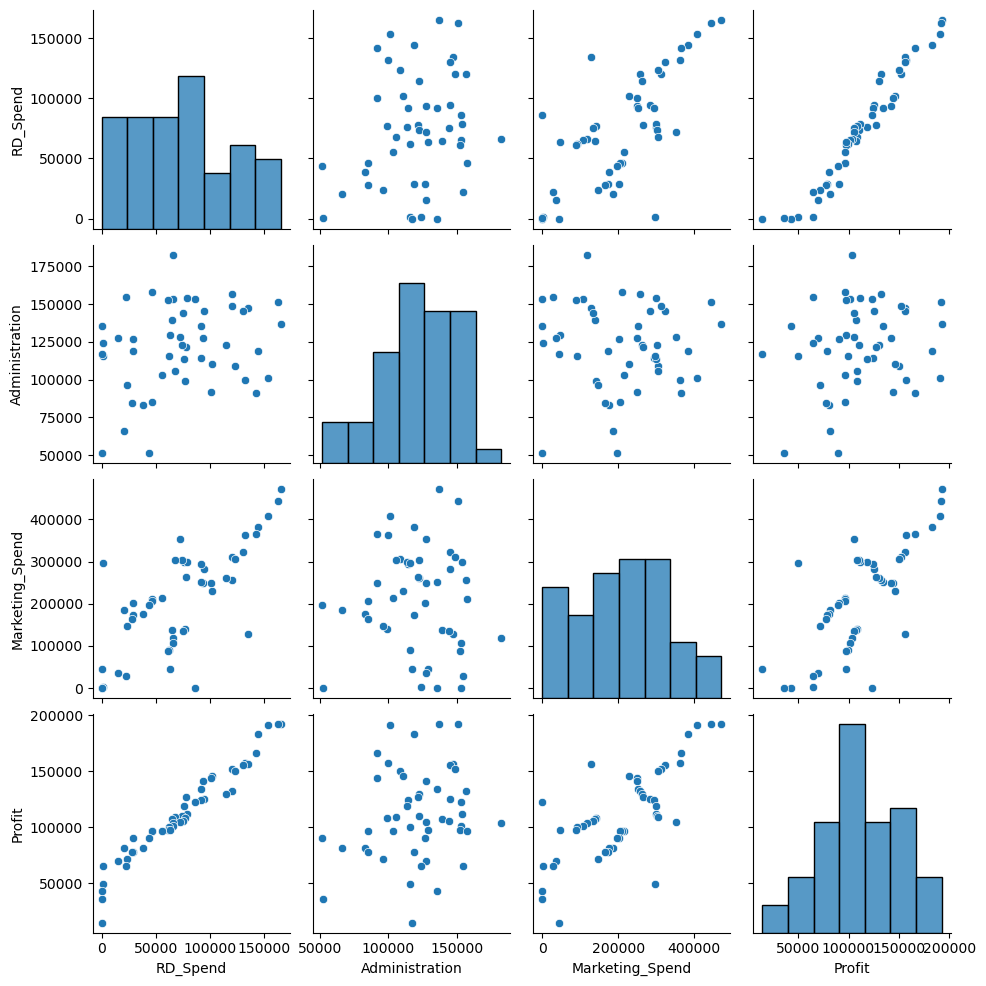

In [60]:
sn.pairplot(df)
plt.show()

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/5,random_state=0)

In [62]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40, 3)
(10, 3)
(40,)
(10,)


In [63]:
lrm = LinearRegression()
lrm.fit(X_train,y_train)

LinearRegression()

In [64]:
lrm.coef_
print(f"m1 value is {lrm.coef_[0]}")
print(f"m2 value is {lrm.coef_[1]}")
print(f"m3 value is {lrm.coef_[2]}")

m1 value is 0.778841044082167
m2 value is 0.029391899097552632
m3 value is 0.03471025486942028


In [65]:
lrm.intercept_
print(f"c value is {lrm.intercept_}")

c value is 42989.00816508668


In [66]:
y_pred = lrm.predict(X_test)
print(y_pred)

[103901.8969696  132763.05993126 133567.90370044  72911.78976736
 179627.92567224 115166.64864795  67113.5769057   98154.80686776
 114756.11555221 169064.01408795]


In [67]:
df1 = pd.DataFrame(y_pred, columns=['Predicted Profit'])
df2 = pd.DataFrame(y_test,columns=['Original Profit'])

In [68]:
pd.concat([df1,df2],axis=1)

,Predicted Profit,Original Profit
0,103901.896970,103282.38
1,132763.059931,144259.40
2,133567.903700,146121.95
3,72911.789767,77798.83
4,179627.925672,191050.39
5,115166.648648,105008.31
6,67113.576906,81229.06
7,98154.806868,97483.56
8,114756.115552,110352.25
9,169064.014088,166187.94


In [69]:
R2=metrics.r2_score(y_test,y_pred)
MSE=metrics.mean_squared_error(y_test,y_pred)
MAE=metrics.mean_absolute_error(y_test,y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_pred))

print("R2 = ",R2)
print("MSE = ",MSE)
print("MAE =",MAE)
print("RMSE =",RMSE)

R2 =  0.9393955917820572
MSE =  77506468.16885388
MAE = 7320.441614848123
RMSE = 8803.77579046933
